In [14]:
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [5]:
# Create the dataset

#number of registers
n = 500

#number of characteristics per register
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

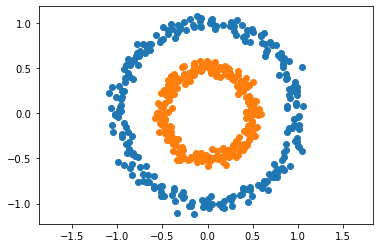

In [15]:
plt.scatter(X[Y == 0, 0], X[Y== 0, 1])
plt.scatter(X[Y == 1, 0], X[Y== 1, 1])
plt.axis("equal")
plt.show()